In [101]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [122]:
class LinearRegression:
        
    #features = numpy matrix of n * m 
    #labels = numoy matrix of n  * 1
    def __init__(self, features, labels):
        
        if features is None:
            raise ValueError('Features cannot be None')
        if labels is None:
            raise ValueError('Labels cannot be None')
        
        self.number_of_features = np.shape(features)[1]
        self.number_of_examples = np.shape(features)[0]
        self.labels = labels
        self.weights = np.ones((1,self.number_of_features + 1))
        self.features = self.add_row_of_ones(features)
        
    def train(self, regulatization_rate = None, learning_rate = 0.0001, number_of_iterations = 10):
        
        self.regularization_rate = regulatization_rate
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        
        
        mean_square_error_per_interation = [None] * self.number_of_iterations

        for i in range(0, self.number_of_iterations):
            predicted_value = np.matmul(self.features, np.transpose(self.weights))
            mean_square_error_per_interation[i] = mean_squared_error(self.labels, predicted_value)
            error = np.subtract(predicted_value,self.labels)
            temp1 = np.multiply(error, self.features)
            temp2 = np.transpose(temp1)
            temp3 = np.sum(temp2, axis=1)
            temp4 = np.asmatrix(temp3)
            gradient_decent = np.multiply(np.divide(temp4, self.number_of_examples), learning_rate)
            self.weights = np.subtract(self.weights, np.transpose(gradient_decent))
        return mean_square_error_per_interation
    
    #input_data : numpy matrix of size = n * m  , output expected value
    def predict(input_data):
        return np.matmul(input_data, np.transpose(self.weights))
 
    #input_data : numpy matrix of size = n * m, actual_value numpy matrix of size n * 1 
    #output expected value and mse value
    def predict_with_mse(input_data, actual_value):
        predicted_value = predict(self.features)
        return predict(input_data), mean_squared_error(actual_value, predicted_value)
    
    def add_row_of_ones(self, features):
        number_of_rows = np.shape(features)[0]
        row_of_ones = np.ones(shape=[number_of_rows,1])
        return np.hstack([row_of_ones, features])
    

    def data_validation(features, labels):
        
        # of examples should be same 
        return None

#### Example To Show the Use Of Linear Regression

In [47]:
data = pd.read_csv('/Users/amitjain/personalProjects/Machine-Learning/Projects/Student_Grade_Prediction/student-mat.csv');

In [48]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [49]:
selected_feature_data = data[['G1','G2','G3']]
selected_feature_data.describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


In [50]:
training_features = ['G1', 'G2']
label_feature = ['G3']

m = selected_feature_data.shape[0]
n = len(training_features)
percentage_of_training = 80

number_example_in_training = int((percentage_of_training * m)/100)
number_example_in_test = int(m - number_example_in_training)

print('number_example_in_training', number_example_in_training)
print('number_example_in_test', number_example_in_test)

number_example_in_training 316
number_example_in_test 79


In [52]:
training_data_features = selected_feature_data.head(number_example_in_training)[training_features]
training_data_labels = selected_feature_data.head(number_example_in_training)[label_feature]

test_data_features = selected_feature_data.head(number_example_in_test)[training_features]
test_data_labels = selected_feature_data.head(number_example_in_test)[label_feature]


print('shape of traing data features', training_data_features.shape)
print('shape of traing data labels', training_data_labels.shape)
print('shape of test data features', test_data_features.shape)
print('shape of test data features', test_data_labels.shape)

shape of traing data features (316, 2)
shape of traing data labels (316, 1)
shape of test data features (79, 2)
shape of test data features (79, 1)


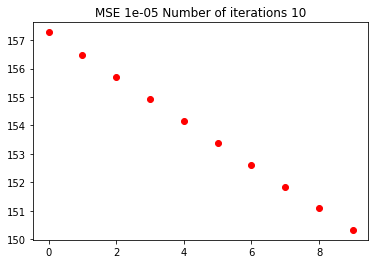

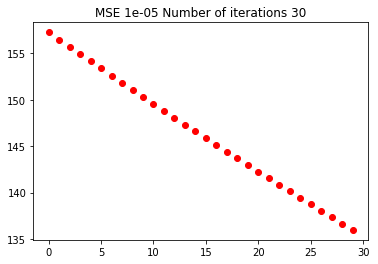

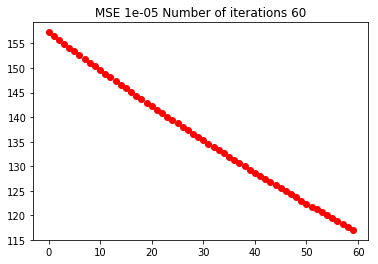

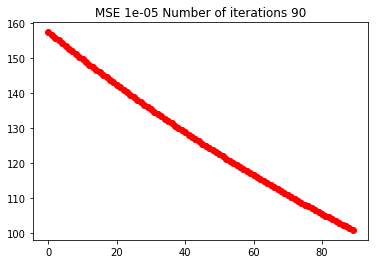

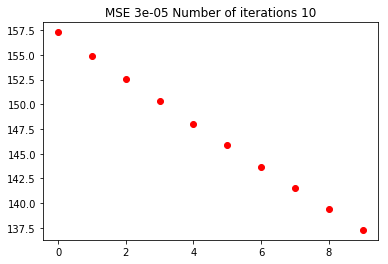

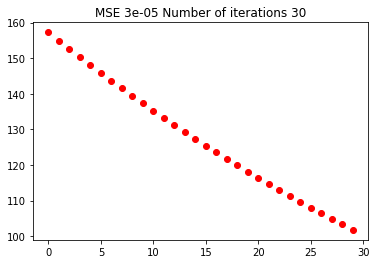

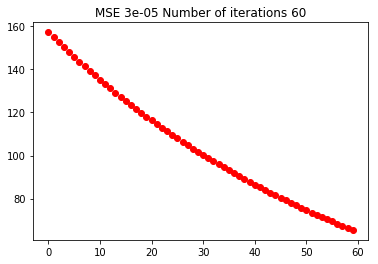

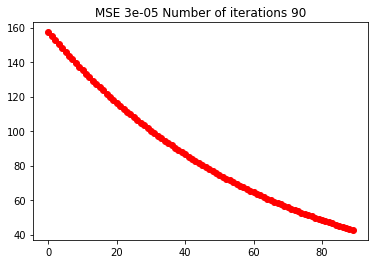

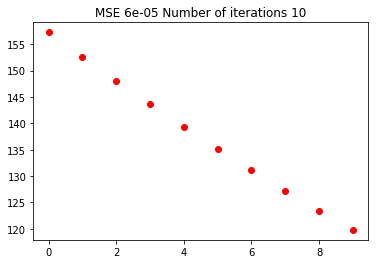

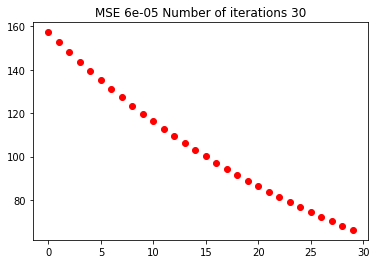

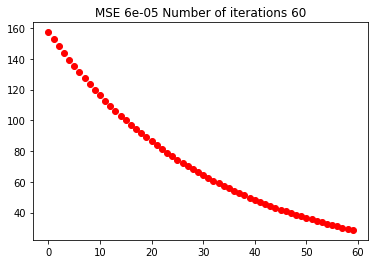

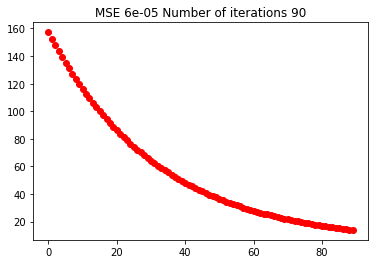

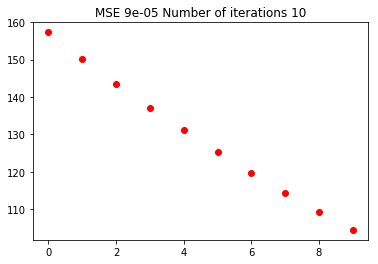

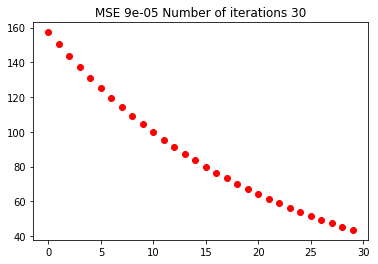

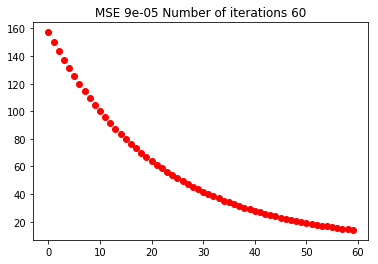

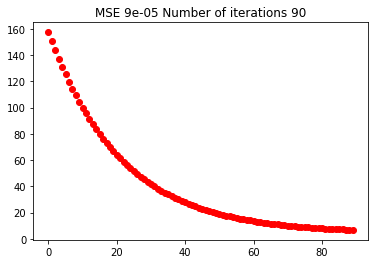

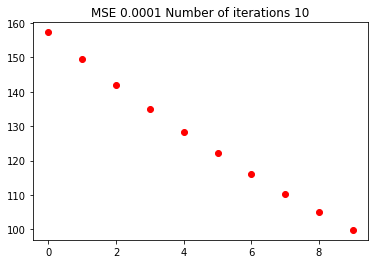

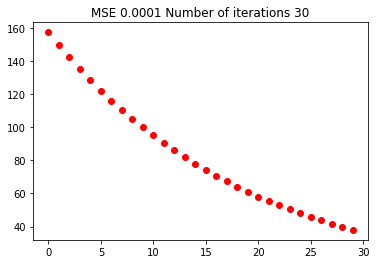

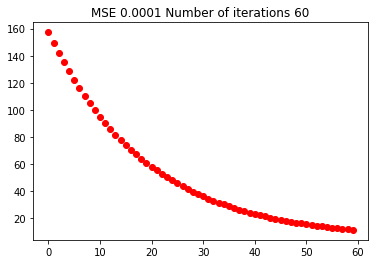

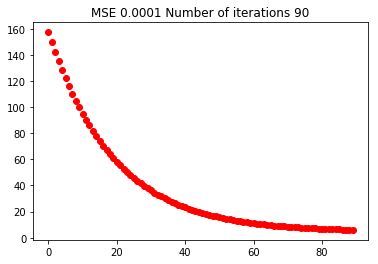

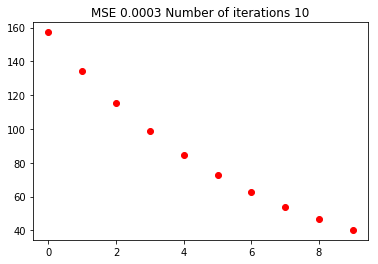

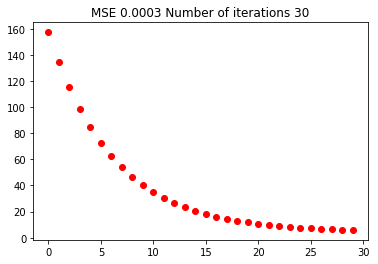

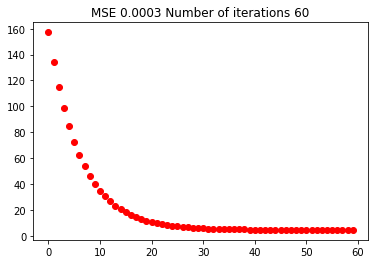

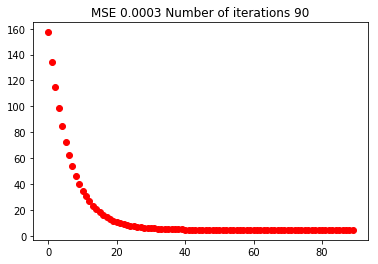

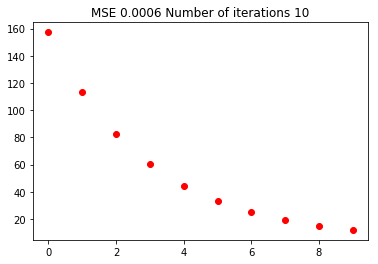

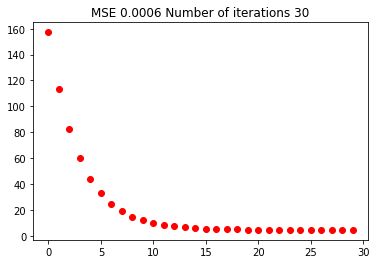

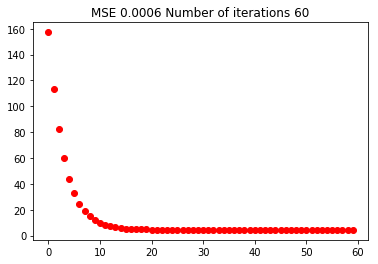

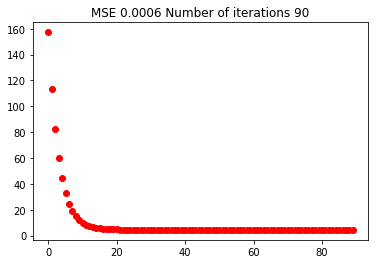

In [138]:
learning_rates = [0.00001,0.00003, 0.00006, 0.00009, 0.0001, 0.0003, 0.0006]
number_of_iterations = [10,30, 60, 90]
for i in range(0, len(learning_rates)):
    for j in range(0, len(number_of_iterations)):
        
        model = LinearRegression(features=np.asmatrix(training_data_features), labels=np.asmatrix(training_data_labels))
        mse_array = model.train(number_of_iterations=number_of_iterations[j], learning_rate=learning_rates[i])

        plt.figure(1)    
        plt.plot(mse_array, 'ro')
        plt.title('MSE '+ str(learning_rates[i])+" Number of iterations "+ str(number_of_iterations[j]))
        plt.show()


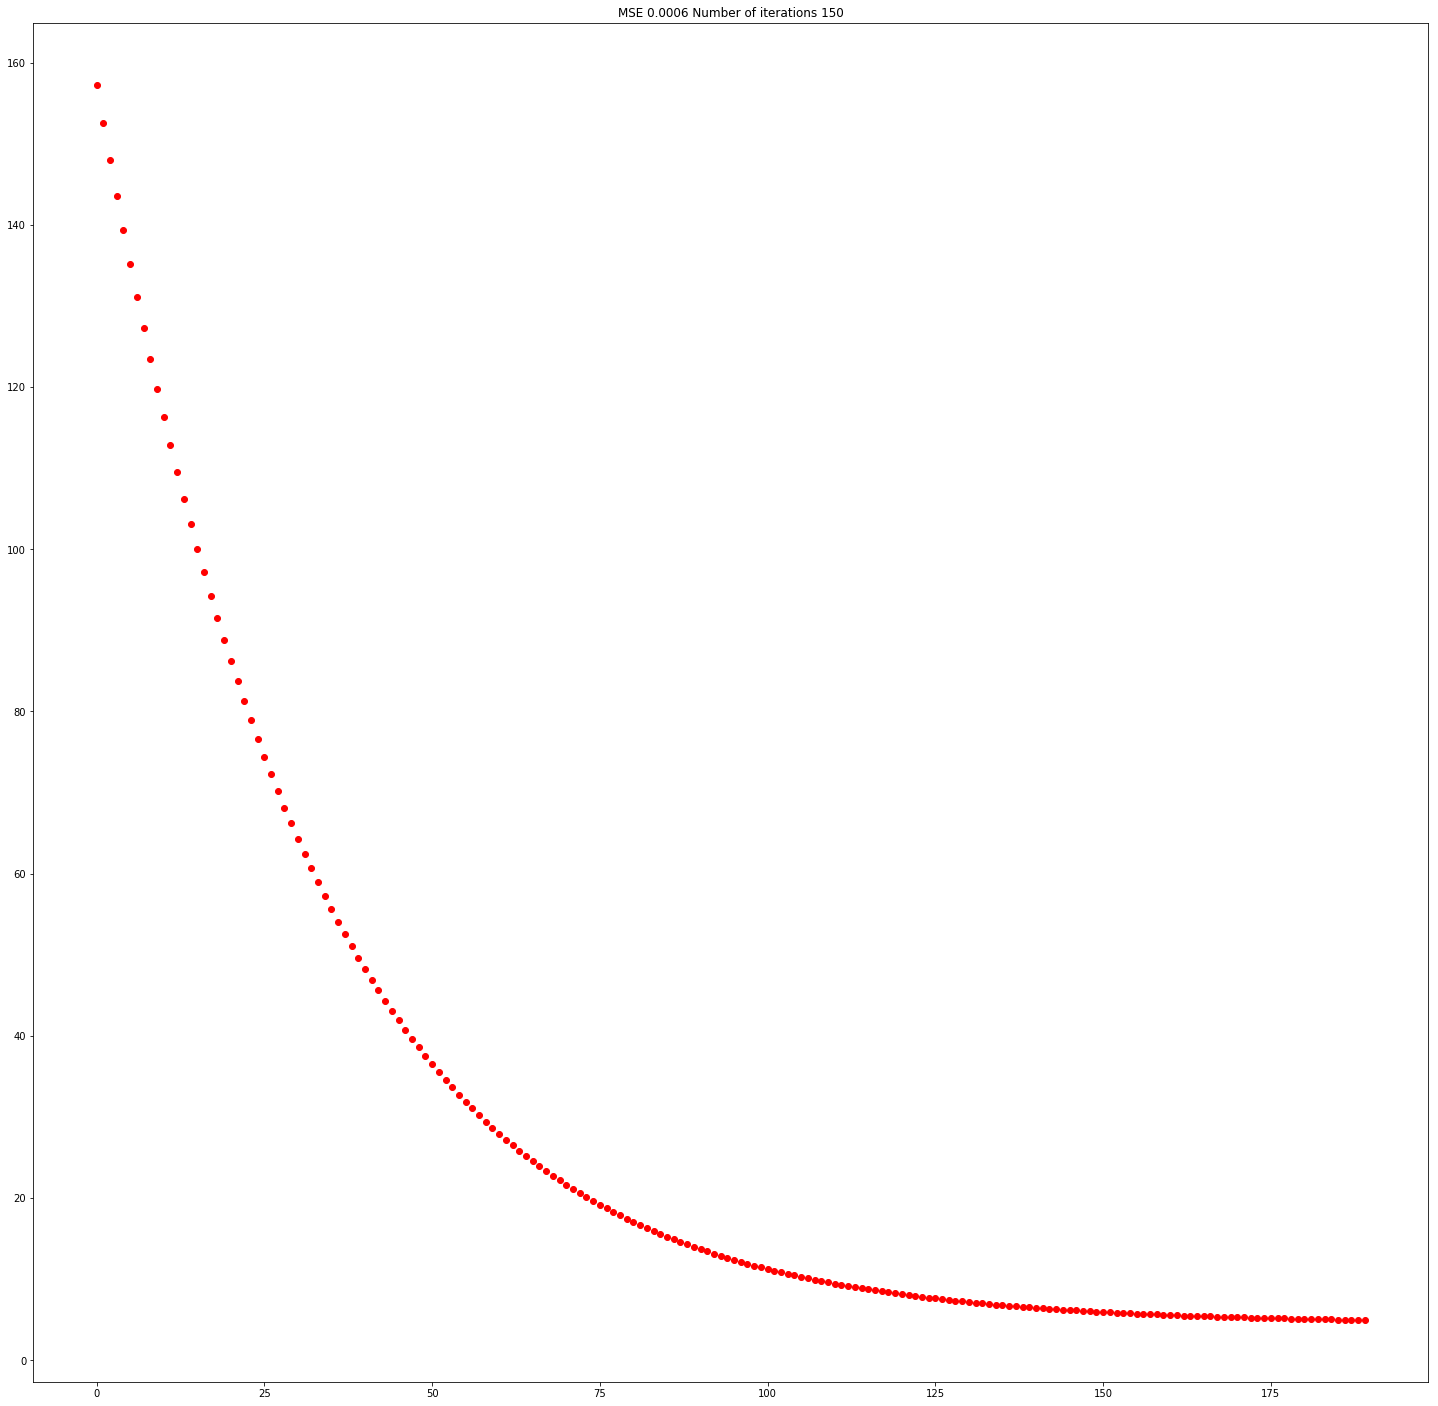

In [158]:
model = LinearRegression(features=np.asmatrix(training_data_features), labels=np.asmatrix(training_data_labels))
mse_array = model.train(number_of_iterations=190, learning_rate=0.00006)
plt.figure(1)    
plt.plot(mse_array, 'ro')
plt.rcParams['figure.figsize'] = [20, 20]
plt.title('MSE '+ str(learning_rates[i])+" Number of iterations 150")
plt.show()